# 数据处理（Python示例）

#### 1、绘制动态图（.gif和.mp4格式）

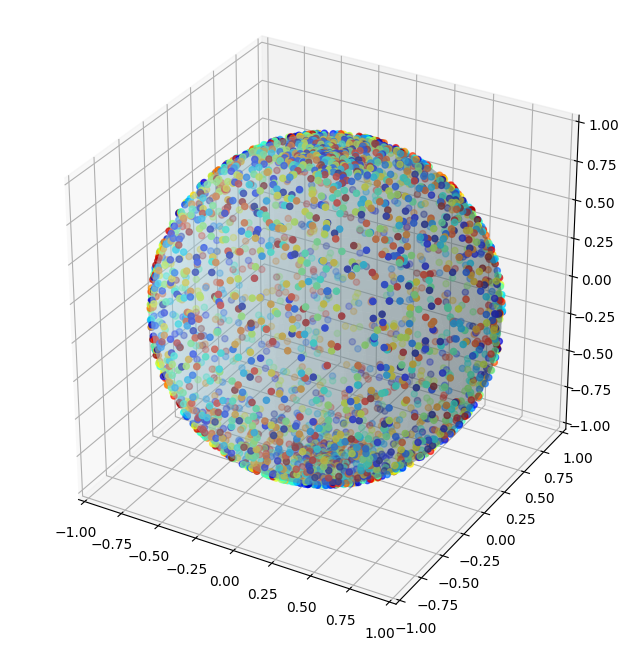

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 初始化三维图形
fig = plt.figure(figsize=(8, 8))  # 默认大小figsize是(12.8, 9.6)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# 设置每个轴的刻度
# ticks = np.linspace(0, 1, 10)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_zticks(ticks)
ax.set_box_aspect([1, 1, 1])  # 保持比例一致

# 绘制球面
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='lightblue', alpha=0.3)

# 保存点数据
points = []


# 动态更新函数
def update(frame):
    ax.clear()
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_box_aspect([1, 1, 1])  # 保持比例一致
    ax.plot_surface(x, y, z, color='lightblue', alpha=0.3)
    # 每次添加10个点
    for _ in range(10):
        theta = np.random.uniform(0, 2 * np.pi)
        phi = np.random.uniform(0, np.pi)
        points.append((np.sin(phi) * np.cos(theta),
                       np.sin(phi) * np.sin(theta),
                       np.cos(phi)))
    # 提取点坐标
    px, py, pz = zip(*points)

    # 颜色根据帧数变化
    colors = plt.cm.jet(np.linspace(0, 1, len(points)))

    # 绘制点
    ax.scatter(px, py, pz, color=colors, s=20)


# 创建动画
ani = FuncAnimation(fig, update, frames=100, interval=100, repeat=False)

# 设置保存路径和参数
save_path = "sphere_points_animation.gif"
writer = PillowWriter(fps=10)  # 设置帧率

# 保存动画
ani.save(save_path, writer=writer)  # 保存为mp4格式
# 或使用writer参数
ani.save("sphere_points_animation.mp4", writer="ffmpeg", fps=10)  # 保存为mp4格式
ani.save("sphere_points_animation.gif", writer="pillow", fps=10)  # 保存为gif格式